In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def h_x(x,theta):
    z = x@theta
    return 1/(1+np.exp(-(z))) + 0.0000001

In [4]:
def cost(x,y,theta):
    y1 = h_x(x,theta)
    return -(1/x.shape[0])*np.sum(y*np.log(y1)+(1-y)*np.log(1-y1))

In [14]:
def gradient_descent(x,y,theta,alpha,epochs):
    m = len(x)
    J = []
    for epoch in range(epochs):
        h = h_x(x,theta)
        step = (1/m)*(x.T@(h-y))
        theta = theta - (alpha*step)
        J.append(cost(x,y,theta))
    return J,theta

In [15]:
# h = h_x(x,theta)
# np.sum(h.values-y.values*x.iloc[:,1].values)

In [16]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
df = pd.concat([pd.Series(1,index = df.index,name = "00"),df],axis = 1)

In [18]:
x = df.drop(["target"],axis = 1).values
y = df[['target']].values

In [19]:
theta = np.zeros((x.shape[1],1))
theta.shape

(14, 1)

In [20]:
J, th = gradient_descent(x, y, theta, 0.0001, 30000) 
h = h_x(x, th)
for i in range(len(h)):
    h[i]=1 if h[i]>=0.5 else 0
y = np.array(y)
acc = np.sum([y[i] == h[i] for i in range(len(y))])/len(y)
acc

0.7953795379537953

In [21]:
loss = []
for i in range(len(J)):
    if J[i] != None:
        loss.append(J[i])

In [22]:
# loss

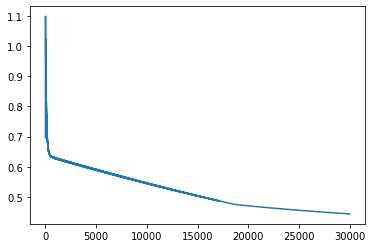

In [23]:
plt.plot(loss)

In [24]:
df.head()

,00,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,1,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,1,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,1,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
